## **Big Mart Sales Prediction 🏪📈**

There is a supermarket that has several outlets around the world and they want us to predict the sales they expect. 🌍🛒

Now what can we derive from this predictions? If we can predict the sales revenue we can tell the company what are some of the challenges they may face in the future and what brands or products sell the most. 📊💡

This helps the sales team to understand which product to place on the shelves and make marketing plans. 🛍️📋

Here we are using 2 Models:
XGBRegressor and RandomForestRegressor. Download the file and test them accordingly on your machine. 🧩🖥️

For some reason if you can't view the file on github or it shows an error, download the file. 🛠️⬇️

**Importing all the dependencies**:

In [86]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

# from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

**Loading our Dataset**

In [2]:
a = pd.read_csv('/content/drive/MyDrive/ML Datasets/Big-Mart-Train.csv')
mart = pd.DataFrame(a)

**Checking for null values**

In [3]:
mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Filling in all the values for Item_weight using mean**

In [4]:
mart['Item_Weight'] = mart['Item_Weight'].fillna(mart['Item_Weight'].mean())

**Now working on Outlet size is tricky cause is related to Outlet type**

Here we are esentially saying see if outlet size is null if yes find the mode of Outlet_type for that particular column and replace it with the missing values.

In [5]:
mode_Outlet_Size = mart.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:x.mode()[0]))

**Here we found the mode of each Out_Type for Outlet_size**

In [6]:
mode_Outlet_Size

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


**Converting the table to dictionary**

In [7]:
mode_Outlet_Size_dict = mode_Outlet_Size['Outlet_Size'].to_dict()

In [9]:
mode_Outlet_Size_dict

{'Grocery Store': 'Small',
 'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

**Defining a fucntion and using if else to get our results. **

In [10]:
def fill_Outlet_Size(row):
  if pd.isnull(row['Outlet_Size']):
    return mode_Outlet_Size_dict[row['Outlet_Type']]
  else:
      return row['Outlet_Size']

**Finally applying it to the Outlet_size**

In [11]:
mart['Outlet_Size'] = mart.apply(fill_Outlet_Size, axis=1)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

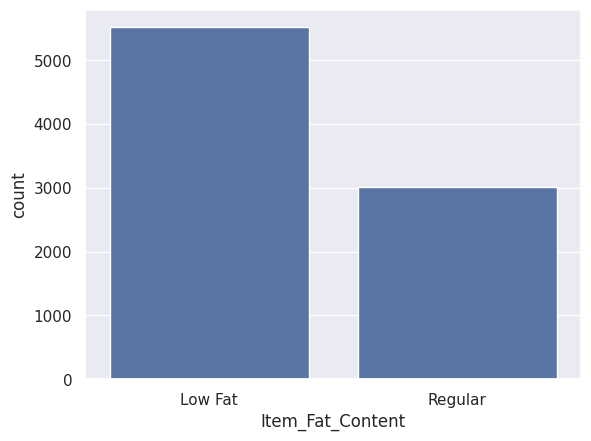

In [16]:
sns.set()
sns.countplot(data=mart, x='Item_Fat_Content')

**Replacing the values**

In [15]:
mart['Item_Fat_Content'] = mart['Item_Fat_Content'].replace('LF', 'Low Fat')
mart['Item_Fat_Content'] = mart['Item_Fat_Content'].replace('low fat', 'Low Fat')
mart['Item_Fat_Content'] = mart['Item_Fat_Content'].replace('reg', 'Regular')

**Doing Label Encoding to categorical columns.**

In [19]:
label_encoder = LabelEncoder()

In [21]:
label = label_encoder.fit_transform(mart.Item_Identifier)

In [22]:
mart['Item_Identifier'] = label

In [26]:
label = label_encoder.fit_transform(mart.Item_Fat_Content)
mart['Item_Fat_Content'] = label

In [28]:
label = label_encoder.fit_transform(mart.Item_Type)
mart['Item_Type'] = label

In [30]:
label = label_encoder.fit_transform(mart.Outlet_Identifier)
mart['Outlet_Identifier'] = label

In [36]:
label = label_encoder.fit_transform(mart.Outlet_Type)
mart['Outlet_Type'] = label

**Seperating Features and label**

In [38]:
X = mart.drop(columns='Item_Outlet_Sales')

In [39]:
Y = mart['Item_Outlet_Sales']

**Splitting into Training and Testing Data**

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [47]:
scaler = StandardScaler()

In [48]:
scaler.fit(X_train)

StandardScaler()

In [49]:
X_train = scaler.transform(X_train)

In [50]:
X_test = scaler.transform(X_test)

In [53]:
X_train.std()

1.0

In [54]:
X_test.std()

1.0029091714597798

In [87]:
model = RandomForestRegressor()

In [88]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [89]:
X_train_prediction = model.predict(X_train)
r_squared = metrics.r2_score(Y_train, X_train_prediction)

print(r_squared)

0.9378978650675726


In [90]:
X_test_prediction = model.predict(X_test)
r_squared = metrics.r2_score(Y_test, X_test_prediction)

print(r_squared)

0.5549380412520456


Text(0.5, 1.0, 'Training data using XGB Regressor')

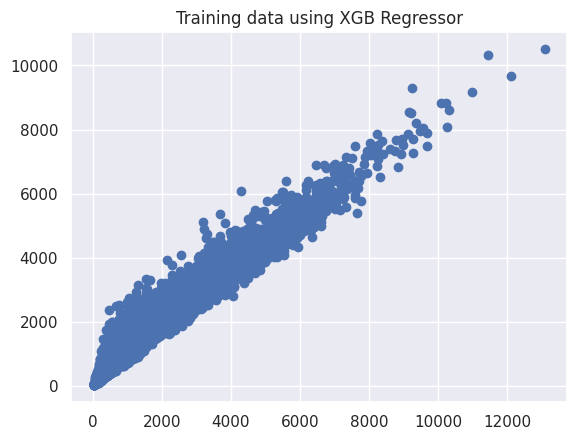

In [91]:
plt.scatter(Y_train, X_train_prediction)
plt.title('Training data using XGB Regressor')

Text(0.5, 1.0, 'Testing data using XGB Regressor')

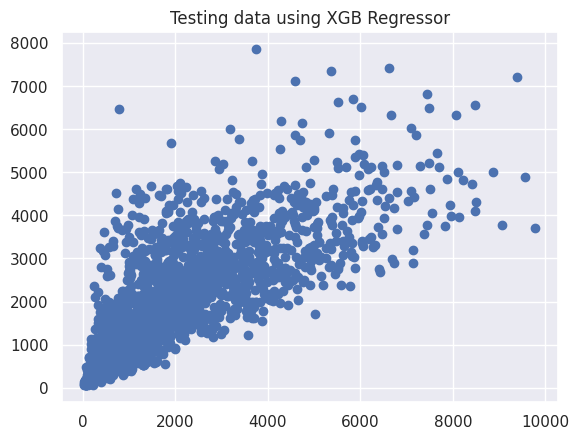

In [92]:
plt.scatter(Y_test, X_test_prediction)
plt.title('Testing data using XGB Regressor')

In [105]:
input_data = (961,12.857645184135976,1,0.076434542,6,155.8946,4,1985,2,0,0)

In [106]:
input_data_numpy = np.asarray(input_data)

In [107]:
input_data_reshape = input_data_numpy.reshape(1,-1)

In [108]:
std = scaler.transform(input_data_reshape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [109]:
prediction = model.predict(std)

In [110]:
print("The sales of this supermaret is $", prediction[0])

The sales of this supermaret is $ 292.905394
